In [137]:
#set up
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd
from wordcloud import WordCloud
import collections 

In [99]:
data = pickle.load(open("All_email.txt","rb"))
#deal with year
data = data.loc[data.Year.isin(['1999','2000','2001','2002','2003','2004','2005','2006','2007'])]

In [100]:
#Seperate to training data/test data
train, test = train_test_split(data, test_size = 0.3)

In [64]:
#training data, testing data
#Text preprocessing
#tokenizing, filtering of stopwords
#word dictionary of features
#transform documents to feature vectors:

In [101]:
#tfidf(original,bi,tri)
count = CountVectorizer(ngram_range=(1,1))
count_bi = CountVectorizer(ngram_range=(1,2))
count_tri = CountVectorizer(ngram_range=(1,3))

X_train_counts = count.fit_transform(train['Content'])
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)

In [102]:
X_train_counts = count_bi.fit_transform(train['Content'])

In [103]:
#Number of spam/ham in overall data
print collections.Counter(data['Year'])

number of spam/ham Counter({'spam': 98938, 'ham': 60951})
Counter({'2007': 74226, '2005': 19727, '2002': 15943, '2004': 14047, '2000': 11363, '2001': 10720, '1999': 7589, '2006': 3956, '2003': 2318})


In [144]:
c = collections.Counter()
c.update(data['Classification'])
pd.DataFrame({'ham': c['ham'],'spam':c['spam']},index=[0])

,ham,spam
0,60951,98938


In [ ]:
set(data['Year'])

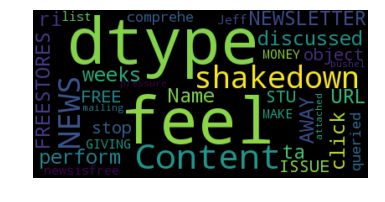

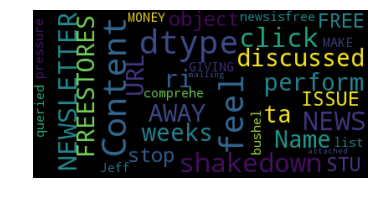

In [85]:
#word cloud
# Generate a word cloud image
wordcloud = WordCloud().generate(str(data['Content'][0]))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(str(data['Content'][0]))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()